In [1]:
# Install necessary packages
!pip install scikit-image opencv-python-headless


In [4]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=be584471d332881a4befd3aa1fa263360e6cd65ec4ed0eff9dd6ec87265f83c7
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [5]:
from deepface import DeepFace
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import io

def upload_and_compare_faces(model_name='Facenet', threshold=0.3):
    print("Upload two face images:")
    uploaded = files.upload()

    if len(uploaded) != 2:
        raise ValueError("Please upload exactly two images.")

    file_list = list(uploaded.keys())
    img_path1, img_path2 = file_list[0], file_list[1]

    # Run DeepFace verification
    try:
        result = DeepFace.verify(img1_path=img_path1,
                                 img2_path=img_path2,
                                 model_name=model_name,
                                 enforce_detection=True)

        distance = result["distance"]
        verified = result["verified"]
        similarity_score = 1 - distance  # optional for cosine-based models

        # Load images for display
        img1 = Image.open(img_path1)
        img2 = Image.open(img_path2)

        # Plot images side by side
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img1)
        plt.title("Image 1")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(img2)
        plt.title("Image 2")
        plt.axis("off")

        plt.suptitle(
            f"Similarity Score: {similarity_score:.2f} | {'✅ Match' if verified else '❌ Impostor'}",
            fontsize=14,
            color="green" if verified else "red"
        )
        plt.show()

        print(f"\n✅ DeepFace Result:")
        print(f"Verified: {verified}")
        print(f"Distance: {distance:.4f}")
        print(f"Similarity Score (1 - distance): {similarity_score:.2f}")

        if not verified or distance > threshold:
            print("⚠️ ALERT: Impostor candidate detected!")
        else:
            print("✅ Verified: Same identity.")

    except Exception as e:
        print(f"Error: {str(e)}")


25-06-25 19:33:34 - Directory /root/.deepface has been created
25-06-25 19:33:34 - Directory /root/.deepface/weights has been created


Upload two face images:


Saving WIN_20250625_23_11_43_Pro.jpg to WIN_20250625_23_11_43_Pro.jpg
Saving WIN_20250625_23_12_05_Pro.jpg to WIN_20250625_23_12_05_Pro.jpg
25-06-25 19:33:58 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:02<00:00, 35.6MB/s]


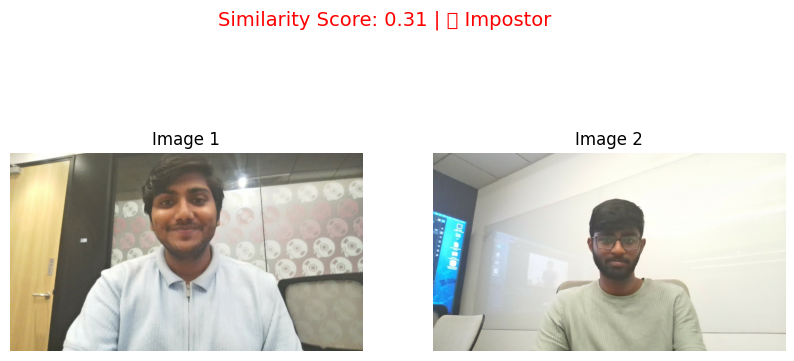


✅ DeepFace Result:
Verified: False
Distance: 0.6919
Similarity Score (1 - distance): 0.31
⚠️ ALERT: Impostor candidate detected!


In [6]:
upload_and_compare_faces()
